In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C://Users//athar//Downloads//iris_dataset//Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dfX = df.drop('Id',axis=1)

In [5]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dfX.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dfX['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Species'>

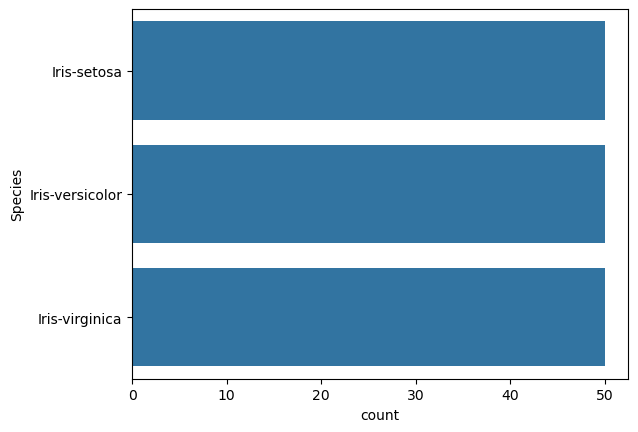

In [8]:
sns.countplot(df['Species'])

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

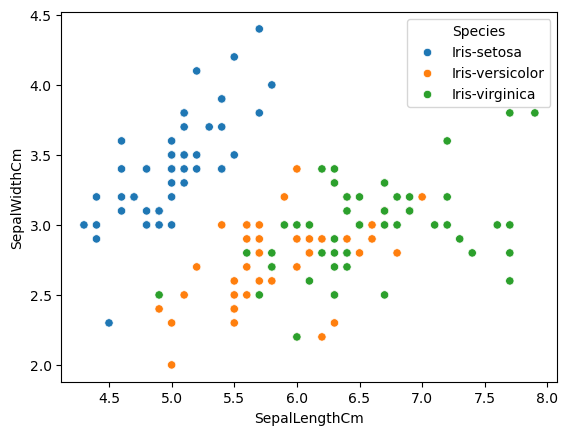

In [9]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=dfX,hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

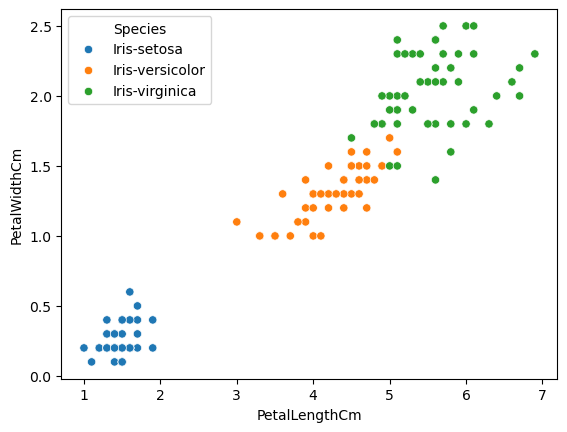

In [10]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=dfX,hue='Species')

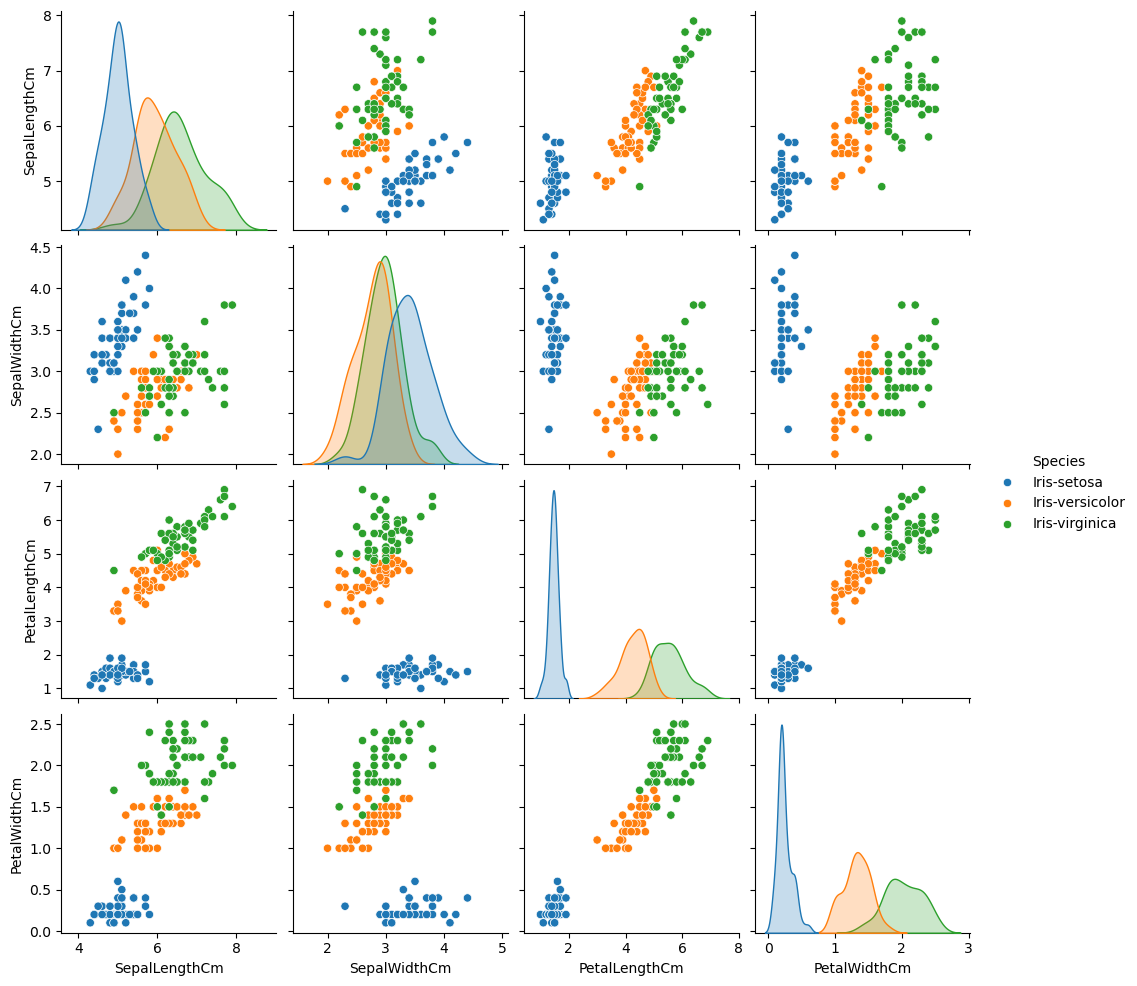

In [11]:
sns.pairplot(dfX,hue='Species')

In [12]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


<Axes: >

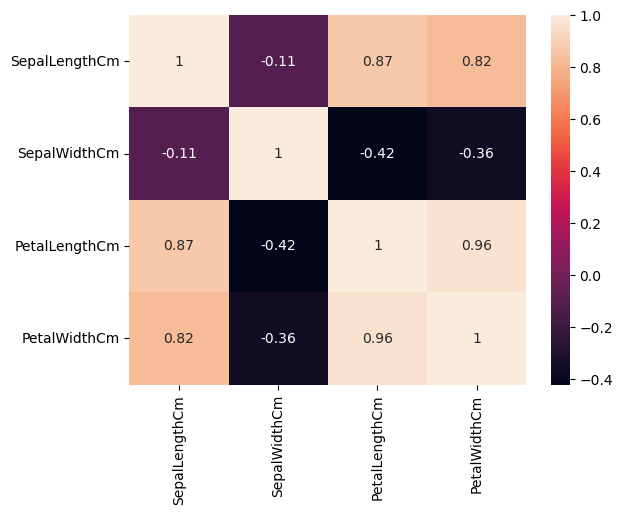

In [13]:
sns.heatmap(dfX.corr(numeric_only=True),annot=True)

In [14]:
X = dfX.drop('Species',axis=1)
y = dfX['Species']

In [15]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [16]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
#y = pd.get_dummies(y, drop_first=True,dtype = int)

In [18]:
y = pd.get_dummies(y,dtype = int)

In [19]:
y 

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [20]:
#X,y

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier()

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [28]:
model.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [29]:
base_pred = model.predict(scaled_X_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
accuracy_score(y_test,base_pred)

0.9555555555555556

In [32]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.96      0.96      0.96        45



In [33]:
y_test_labels = np.argmax(y_test, axis=1)
base_pred_labels = np.argmax(base_pred, axis=1)

cm = confusion_matrix(y_test_labels, base_pred_labels)
print(cm)

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


In [34]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.96      0.96      0.96        45



In [35]:
model.feature_importances_

array([0.        , 0.02153993, 0.5595103 , 0.41894977])

In [36]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
SepalLengthCm,0.00000
SepalWidthCm,0.02154
PetalLengthCm,0.55951
PetalWidthCm,0.41895


<Axes: xlabel='Species', ylabel='SepalLengthCm'>

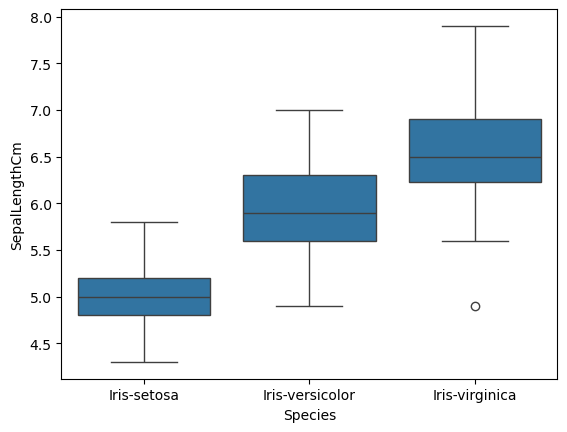

In [37]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df)

In [38]:
from sklearn.tree import plot_tree

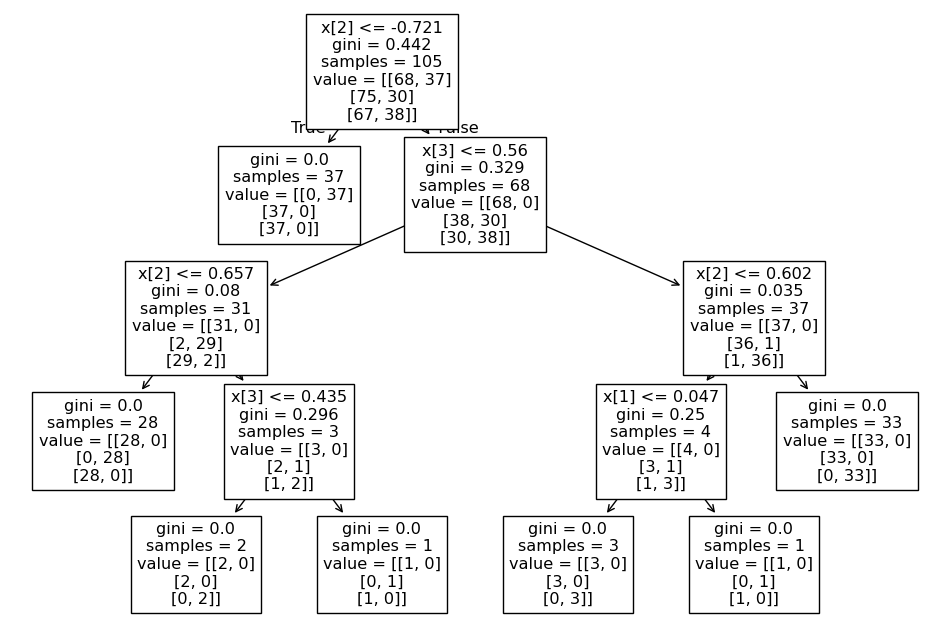

In [39]:
plt.figure(figsize=(12,8))
plot_tree(model);

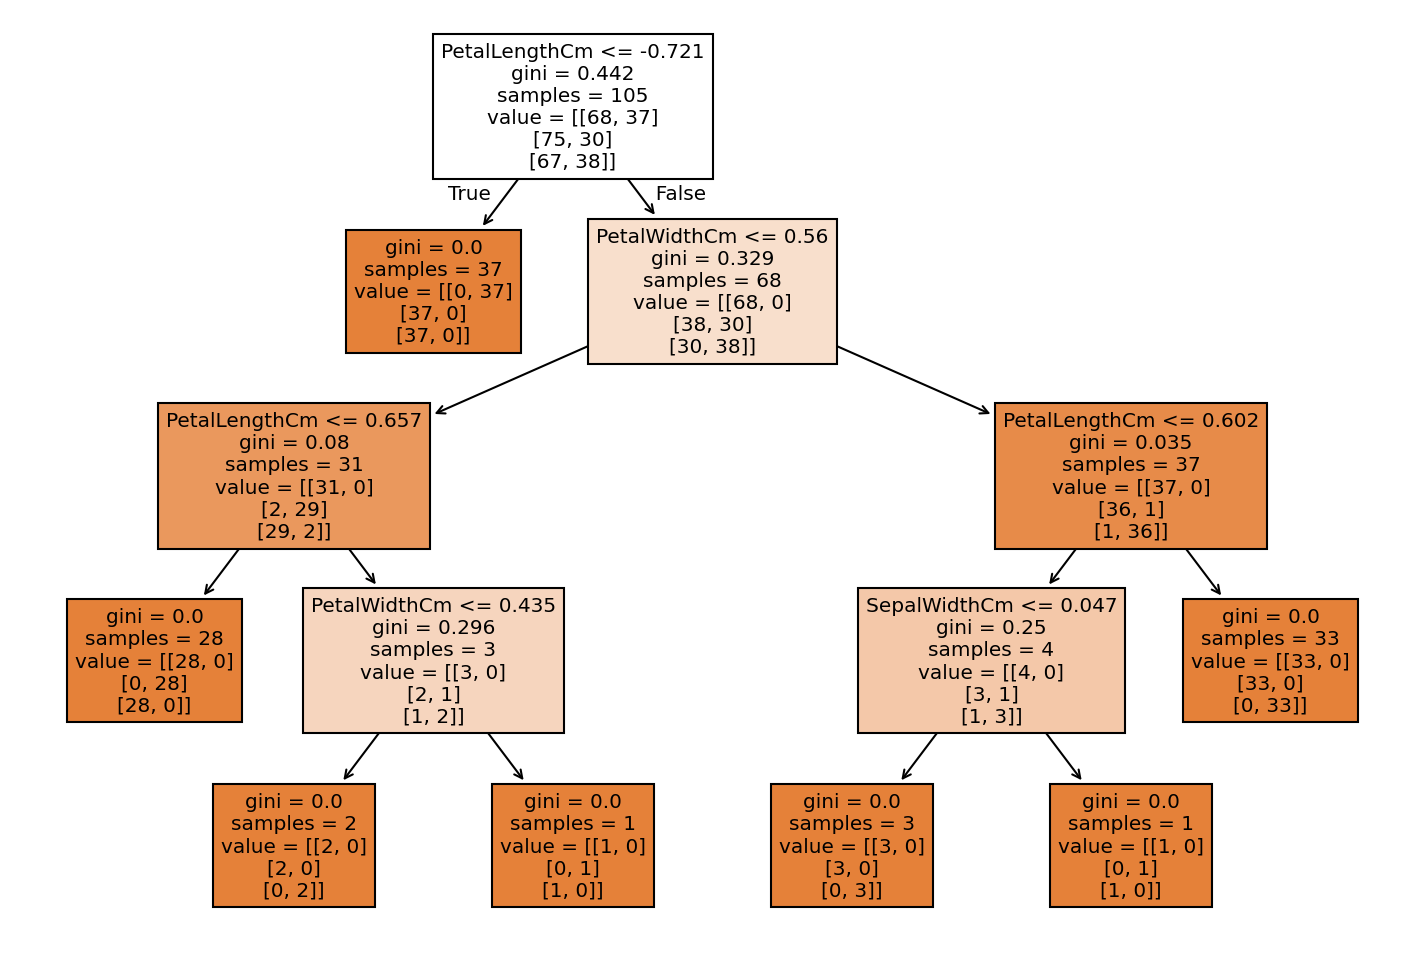

In [40]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

In [41]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [42]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.95      0.93        20
           2       0.91      0.83      0.87        12

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45





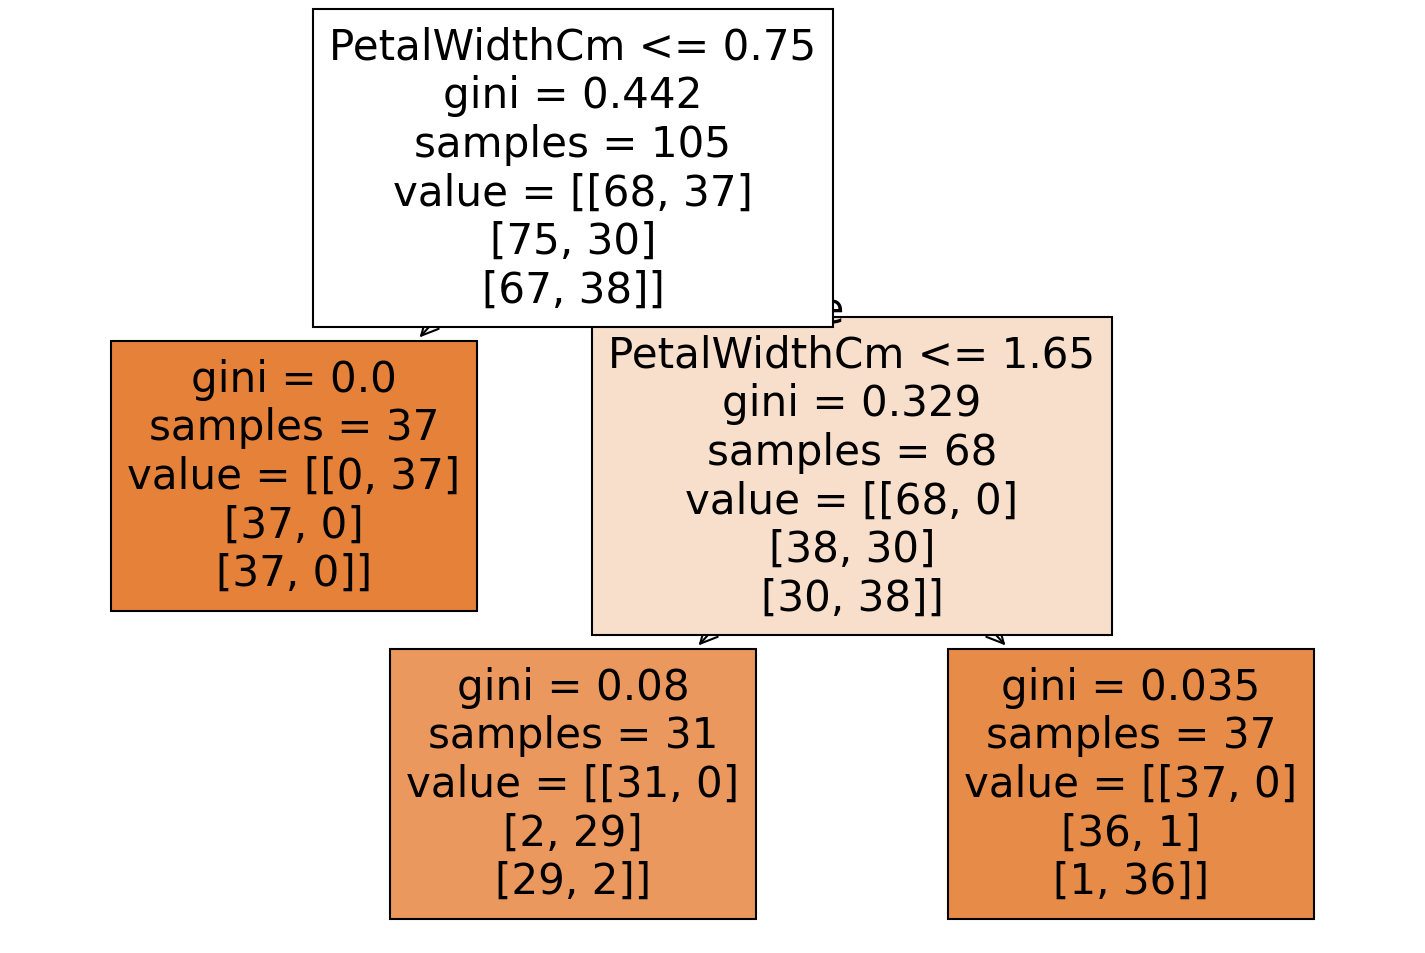

In [43]:
report_model(pruned_tree)

In [44]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.95      0.93        20
           2       0.91      0.83      0.87        12

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45





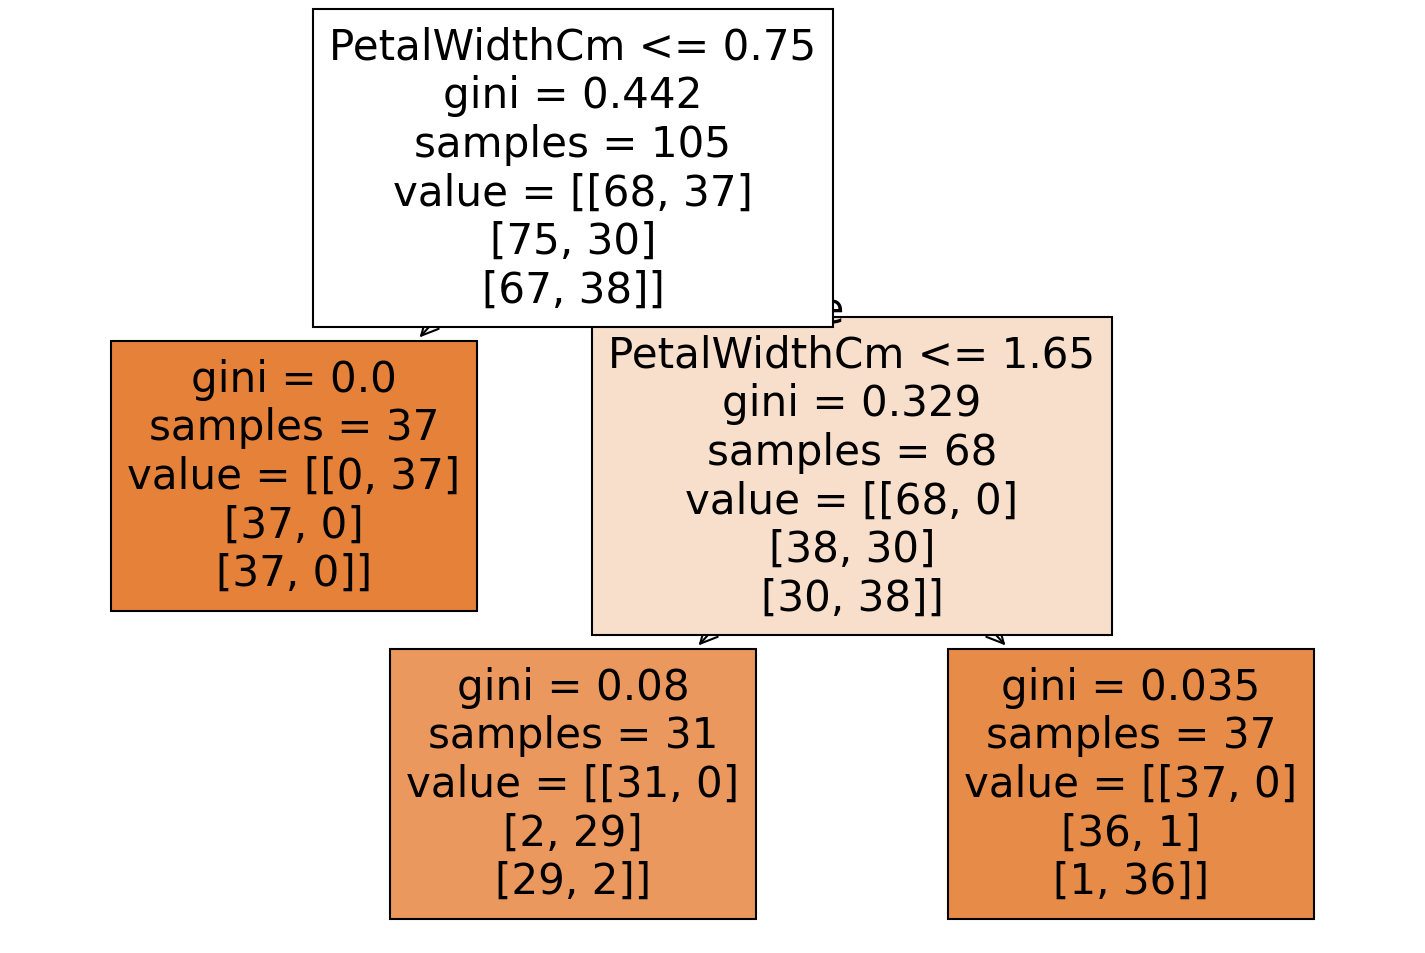

In [45]:
report_model(pruned_tree)

In [46]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.96      0.96      0.96        45





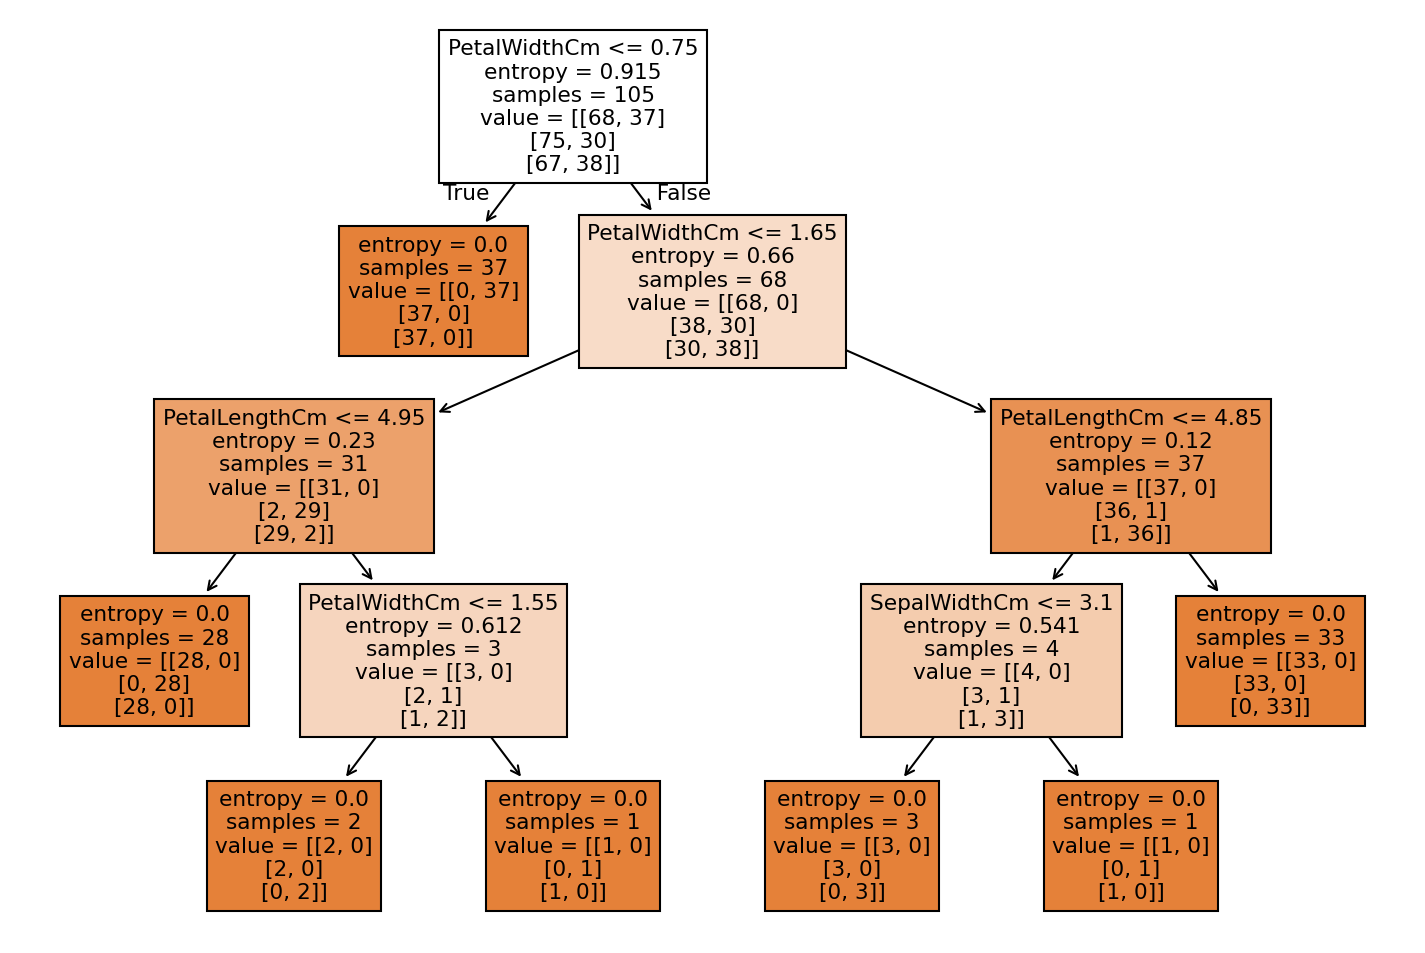

In [47]:
report_model(entropy_tree)

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
max_leaf_nodes = [2,3,4, 6, 8,]
criterion = ['gini', 'entropy','None']
max_depth = [2,4,6,8,10,12]

In [50]:
param_grid = {'max_leaf_nodes':max_leaf_nodes,
             'criterion':criterion,
             'max_depth':max_depth}  

In [51]:
Dtc = DecisionTreeClassifier()
grid = GridSearchCV(Dtc,param_grid)

In [52]:
grid.fit(X_train,y_train)

C:\Users\athar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\athar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\athar\anaconda3\Lib\site-packag

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'None'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [2, 3, 4, 6, 8]})

In [53]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 3}

In [54]:
predictions = grid.predict(X_test)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.95      0.93        20
           2       0.91      0.83      0.87        12

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45

